# &#x1F4DD; REPORT

# TP : Sinusoidal Spectrum and Parameter Estimation


- The students are asked to submit a report by `12/01/2024`.
- The report contains the answers to the questions (in boldface) below, and includes
plots and Matlab code.
- The TP will be carried out individually. As usual, you can consult moderately with others if you get stuck at some point, but your report/software should be written in your own words, and submitted preferably to xxxxxxx.xxx@eurecom.fr . If you don’t have access to Matlab (though students have the right to a free student license), but you have access to (or you prefer) something else that is more or less equivalent, like Python, you can choose the software of your preference. Please indicate in your report.

### **&#x1F516;** Part **&#x1D408;:** Spectrum Estimation

Initialization: $A_0 = [1], \sigma_{\mathcal{f},0}^2 = \rho_0$

**&#x1F516;** TP environment

The random process that we shall use is of the form

$$
y_k = A_1 \cos(2\pi f_1 k + \phi_1) + A_2 \cos(2\pi f_2 k + \phi_2) + v_k
$$

where $v_k$ is zero-mean unit variance white Gaussian noise. The phases $\phi_i$ are uniform over $[0, 2\pi]$, whereas the default values for the sinusoid amplitudes and frequencies are $A_1 = 20, A_2 = 20, f_1 = 0.057, f_2 = 0.082$.

**&#x1F516;** **&#x0061;)** For the periodogram, how many data points N are required to resolve the two sinusoids? Why?

The number of data points $N$ required to resolve two sinusoids in the periodogram depends on the difference in their frequencies ($f_1$ and $f_2$), the length of the observation window, and the sampling rate.

The resolution of the periodogram is determined by the frequency bin width, which is inversely proportional to the length of the observation window. The formula for the frequency resolution ($\Delta f$) in the periodogram is given by: 

$$\Delta f = \frac{1}{T}$$

where $T$ is the length of the observation window.

To resolve two sinusoids, their frequencies ($f_1$ and $f_2$) should be separated by at least half of the frequency resolution ($\Delta f/2$) to avoid ambiguity. In other words, the criterion for resolving two sinusoids is:

$$|f_1 - f_2| \geq \frac{1}{2T}$$

So, the minimum required number of data points ($N$) is related to the observation window length ($T$) as follows:

$$N \geq 2f_{\text{max}}T$$

where $f_{\text{max}}$ is the maximum frequency of interest, and $T$ is the length of the observation window.

Keep in mind that this is a simplified explanation, and the actual resolution might depend on the specific characteristics of the signal, the noise level, and the analysis technique used. In practice, it's common to choose $N$ to be a power of 2 to leverage fast Fourier transform (FFT) algorithms efficiently.

**&#x1F516;** **&#x0062;)** Generate (using sig.m) one realization of $y_k$ with N = 256 samples and compute (with the rectangular ’boxcar’ window in periodo.m) the periodogram in $N′$ = 64, 128, 256, 512 and 1024 frequency points (make a plot with 6 subplots). When N′ < N, use only the first N′ data samples (explicitly); when $N′ > N$, use zero padding (done automatically by periodo.m). Comment on the effect of $N′$ and formulate a requirement for $N′$ as a function of $N$ for proper evaluation of the periodogram.

In [1]:
using Plots

In [2]:
using FFTW

In [3]:
using Distributions
using Random

In [4]:
include("../modules/operations.jl");

In [5]:
include("window.jl")

window (generic function with 1 method)

In [6]:
Random.seed!(1); # Setting the seed

In [7]:
# Parameters
N = 256 # Replace with the desired window length
𝑓₁, 𝑓₂ = 0.057, 0.082
𝐴₁, 𝐴₂ = 20, 20
ϕ₁, ϕ₂ = -2π * randn(), 2π * randn()
𝑣 = randn();

In [8]:
type = "hamming"  # Replace with the desired window type
w = window(type, N);

In [9]:
# include("periodo.jl");

In [10]:
function periodo(x, N)
    ns = length(x)
    
    if rem(N, 2) != 0
        error("N must be even")
    end

    x = reshape(x, 1, :)  # force a row vector

    if N <= ns
        in = x[1:N]
        ns = N
    else
        in = x ⧺ zeros(1, N - ns)  # zero padding
    end

    𝑋 = abs.(𝓕(in))  ## fft
    𝑋 = 𝑋[1:div(N, 2) + 1] / √(ns)

    f = 0:1/N:0.5

    # The original periodo.m matlab source code has been modified 
    # the sig function is now returning f and DSP to be displayed externally
    # plot(f, 10 * log10.(DSP.^2), xlabel="Normalized frequency", ylabel="dB", grid=true)
    return f, 𝑋
end

periodo (generic function with 1 method)

In [11]:
# include("sig.jl");

In [12]:
function sig(N, sigpar=[0.057, 0.082, 20, 20])
    # Generates N samples of a signal y, consisting of
    # two sinusoids plus white noise of unit variance.
    # sigpar = vector of 4 signal parameters (𝑓₁, 𝑓₂, 𝐴₁, 𝐴₂)

    if length(sigpar) == 0
        sigpar = [0.057, 0.082, 20, 20]
    end

    𝑓₁, 𝑓₂, 𝐴₁, 𝐴₂ = sigpar
    t = 0.0:0.01:N; @show t

    ϕ₁, ϕ₂ = -2π * randn(), 2π * randn()
    𝑣 = randn();
    yₜ = 𝐴₁ .* cos.(2π * 𝑓₁ .* t .+ ϕ₁) + 𝐴₂ .* cos.(2π * 𝑓₂ .* t .+ ϕ₂) .+ 𝑣;

    # The original sig.m matlab source code has been modified 
    # the sig function is now returning x and y to be displayed externally
    return t, yₜ
end

sig (generic function with 2 methods)

In [13]:
t, yₜ = sig(N); 

t = 0.0:0.01:256.0


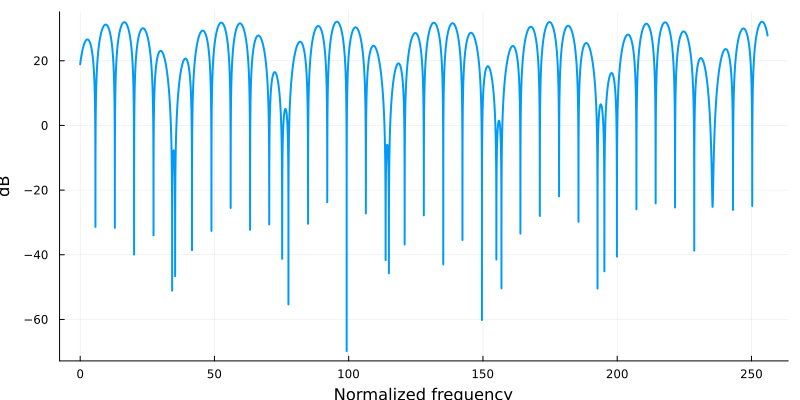

In [14]:
plot(t, 10 * log10.(abs2.(yₜ))
    , xlabel="Normalized frequency", ylabel="dB"
    , grid=true
    , linewidth = 2
    , legend = :none
    , size = ( 800, 400 )
)

In [15]:
x₁ = randn(1000);  # Replace with your signal

In [16]:
f, 𝑋₁ = periodo(x₁, N);

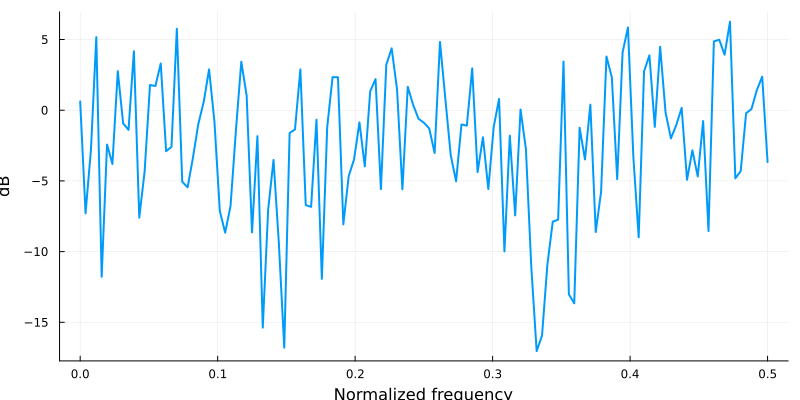

In [17]:
plot(f, 10 * log10.(𝑋₁.^2), xlabel="Normalized frequency", ylabel="dB"
    , grid=true
    , linewidth = 2
    , legend = :none
    , size = ( 800, 400 )
)